In [ ]:
# NOTEBOOK 2: SQL INTEGRATION AND ANALYSIS
## 1. Setup - Import Libraries and Mount Google Drive
import pandas as pd
import sqlite3
from datetime import datetime

# Mount your Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

print("Libraries imported and Google Drive mounted successfully.")

Mounted at /content/drive
Libraries imported and Google Drive mounted successfully.


In [ ]:
# Define file paths
cleaned_csv_path = '/content/drive/MyDrive/Advanced Retail Analytics project/cleaned_superstore.csv'
db_path = '/content/drive/MyDrive/Advanced Retail Analytics project/superstore.db'

# Load the cleaned dataset
df = pd.read_csv(cleaned_csv_path)


In [ ]:
# Convert date columns back to datetime objects, as CSV doesn't store this info
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

In [ ]:
# Create a connection to the SQLite database.
# This will create the database file if it doesn't exist.
conn = sqlite3.connect(db_path)

# Load the DataFrame into a SQL table named 'orders'.
# if_exists='replace' will drop the table first if it exists and create a new one.
df.to_sql('orders', conn, if_exists='replace', index=False)

print(f"Database created at '{db_path}' and 'orders' table loaded with {len(df)} records.")

Database created at '/content/drive/MyDrive/Advanced Retail Analytics project/superstore.db' and 'orders' table loaded with 9994 records.


In [ ]:
## 3. Define a Reusable Query Function
# -----------------------------------------------------------------------------
# This helper function will make it easier to run queries and get results as a DataFrame.
def run_query(query):
    return pd.read_sql_query(query, conn)

# Let's test it with a simple query
test_query = "SELECT DISTINCT category FROM orders;"
print("Testing the query function with distinct categories:")
display(run_query(test_query))

Testing the query function with distinct categories:


,category
0,Furniture
1,Office Supplies
2,Technology


In [ ]:
## 4. Foundational Business Metrics (EDA using SQL)
# This is the core of Exploratory Data Analysis.
# --- 4.1 Product Analysis ---
print("\n--- Top 10 Most Sold Products (by Quantity) ---")
query_top_sold_products = """
SELECT product_name, SUM(quantity) AS total_quantity_sold
FROM orders
GROUP BY product_name
ORDER BY total_quantity_sold DESC
LIMIT 10;
"""
display(run_query(query_top_sold_products))


--- Top 10 Most Sold Products (by Quantity) ---


,product_name,total_quantity_sold
0,Staples,215
1,Staple envelope,170
2,Easy-staple paper,150
3,Staples in misc. colors,86
4,KI Adjustable-Height Table,74
5,Storex Dura Pro Binders,71
6,Avery Non-Stick Binders,71
7,GBC Premium Transparent Covers with Diagonal L...,67
8,"Situations Contoured Folding Chairs, 4/Set",64
9,Staple-based wall hangings,62


In [ ]:
print("\n--- Top 10 Most Profitable Products ---")
query_top_profitable_products = """
SELECT product_name, SUM(profit) AS total_profit
FROM orders
GROUP BY product_name
ORDER BY total_profit DESC
LIMIT 10;
"""
display(run_query(query_top_profitable_products))


--- Top 10 Most Profitable Products ---


,product_name,total_profit
0,Canon imageCLASS 2200 Advanced Copier,25199.9280
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
2,Hewlett Packard LaserJet 3310 Copier,6983.8836
3,Canon PC1060 Personal Laser Copier,4570.9347
4,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
5,Ativa V4110MDD Micro-Cut Shredder,3772.9461
6,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
7,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
8,Ibico EPK-21 Electric Binding System,3345.2823
9,Zebra ZM400 Thermal Label Printer,3343.5360


In [ ]:
# --- 4.2 Sales and Profit Analysis by Category/Region ---
print("\n--- Sales by Category & Sub-Category ---")
query_sales_by_cat = """
SELECT category, sub_category, SUM(sales) AS total_sales
FROM orders
GROUP BY category, sub_category
ORDER BY category, total_sales DESC;
"""
display(run_query(query_sales_by_cat))


--- Sales by Category & Sub-Category ---


,category,sub_category,total_sales
0,Furniture,Chairs,328449.1030
1,Furniture,Tables,206965.5320
2,Furniture,Bookcases,114879.9963
3,Furniture,Furnishings,91705.1640
4,Office Supplies,Storage,223843.6080
5,Office Supplies,Binders,203412.7330
6,Office Supplies,Appliances,107532.1610
7,Office Supplies,Paper,78479.2060
8,Office Supplies,Supplies,46673.5380
9,Office Supplies,Art,27118.7920


In [ ]:
print("\n--- Profit by Region ---")
query_profit_by_region = """
SELECT region, SUM(profit) AS total_profit
FROM orders
GROUP BY region
ORDER BY total_profit DESC;
"""
display(run_query(query_profit_by_region))


--- Profit by Region ---


,region,total_profit
0,West,108418.4489
1,East,91522.7800
2,South,46749.4303
3,Central,39706.3625


In [ ]:
# --- 4.3 Customer Analysis ---
print("\n--- Top 10 Most Profitable Customers ---")
query_top_profitable_customers = """
SELECT customer_name, SUM(profit) AS total_profit
FROM orders
GROUP BY customer_name
ORDER BY total_profit DESC
LIMIT 10;
"""
display(run_query(query_top_profitable_customers))


--- Top 10 Most Profitable Customers ---


,customer_name,total_profit
0,Tamara Chand,8981.3239
1,Raymond Buch,6976.0959
2,Sanjit Chand,5757.4119
3,Hunter Lopez,5622.4292
4,Adrian Barton,5444.8055
5,Tom Ashbrook,4703.7883
6,Christopher Martinez,3899.8904
7,Keith Dawkins,3038.6254
8,Andy Reiter,2884.6208
9,Daniel Raglin,2869.0760


In [ ]:
# --- 4.4 Trend and Operational Analysis ---
print("\n--- Monthly Sales Trend ---")
query_monthly_sales = """
SELECT
    STRFTIME('%Y-%m', order_date) AS sales_month,
    SUM(sales) AS total_sales
FROM
    orders
GROUP BY
    sales_month
ORDER BY
    sales_month;
"""
display(run_query(query_monthly_sales))



--- Monthly Sales Trend ---


,sales_month,total_sales
0,2014-01,14236.8950
1,2014-02,4519.8920
2,2014-03,55691.0090
3,2014-04,28295.3450
4,2014-05,23648.2870
5,2014-06,34595.1276
6,2014-07,33946.3930
7,2014-08,27909.4685
8,2014-09,81777.3508
9,2014-10,31453.3930


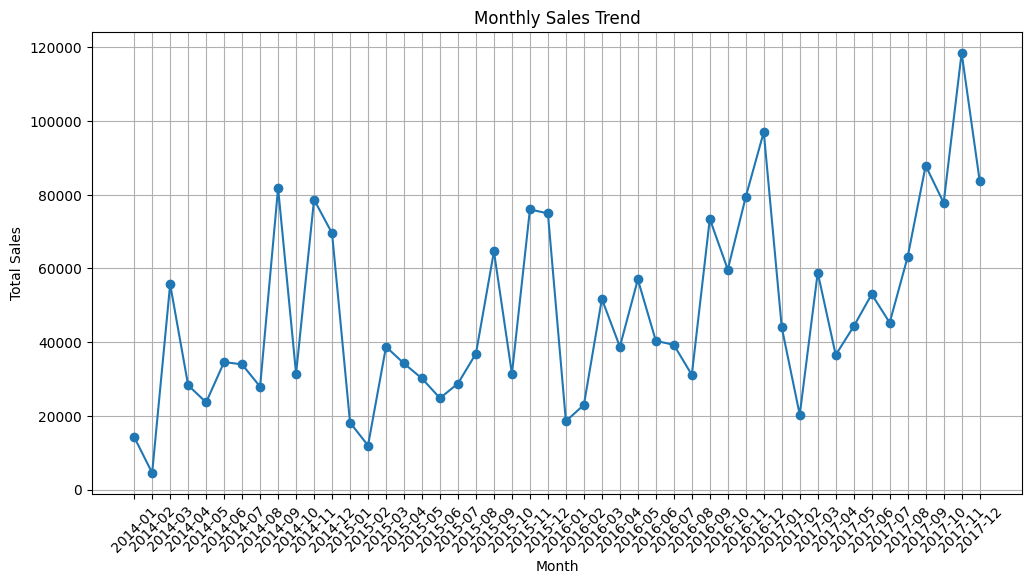

In [ ]:
monthly_sales_df = run_query(query_monthly_sales)
# Let's create a quick plot to visualize the trend
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales_df['sales_month'], monthly_sales_df['total_sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:

print("\n--- Sales Contribution by Shipping Mode ---")
query_sales_by_ship_mode = """
SELECT ship_mode, SUM(sales) as total_sales, (SUM(sales) * 100.0 / (SELECT SUM(sales) FROM orders)) as percentage_contribution
FROM orders
GROUP BY ship_mode
ORDER BY total_sales DESC;
"""
display(run_query(query_sales_by_ship_mode))


--- Sales Contribution by Shipping Mode ---


,ship_mode,total_sales,percentage_contribution
0,Standard Class,1.358216e+06,59.124814
1,Second Class,4.591936e+05,19.989265
2,First Class,3.514284e+05,15.298115
3,Same Day,1.283631e+05,5.587806


In [ ]:
## 5. Advanced Analysis: RFM Segmentation
# -----------------------------------------------------------------------------
# RFM (Recency, Frequency, Monetary) is a powerful marketing analysis technique.
# We calculate these values for each customer.

# First, let's find the last order date in the dataset to calculate recency from.
# We'll set our "snapshot date" to one day after the last order.
snapshot_date_query = "SELECT DATE(MAX(order_date), '+1 day') as snapshot_date FROM orders;"
snapshot_date = run_query(snapshot_date_query)['snapshot_date'][0]
print(f"Snapshot date for RFM analysis: {snapshot_date}")

# Now, we use a Common Table Expression (CTE) to calculate R, F, and M.
query_rfm = f"""
WITH rfm_data AS (
    SELECT
        customer_id,
        customer_name,
        JULIANDAY('{snapshot_date}') - JULIANDAY(MAX(order_date)) AS recency,
        COUNT(DISTINCT order_id) AS frequency,
        SUM(sales) AS monetary
    FROM
        orders
    GROUP BY
        customer_id,
        customer_name
)
SELECT
    *
FROM
    rfm_data
ORDER BY
    monetary DESC;
"""

print("\n--- RFM Analysis Results ---")
rfm_df = run_query(query_rfm)
display(rfm_df.head(10)) # Display top 10 by monetary value

Snapshot date for RFM analysis: 2017-12-31

--- RFM Analysis Results ---


,customer_id,customer_name,recency,frequency,monetary
0,SM-20320,Sean Miller,80.0,5,25043.050
1,TC-20980,Tamara Chand,400.0,5,19052.218
2,RB-19360,Raymond Buch,97.0,6,15117.339
3,TA-21385,Tom Ashbrook,70.0,4,14595.620
4,AB-10105,Adrian Barton,42.0,10,14473.571
5,KL-16645,Ken Lonsdale,48.0,12,14175.229
6,SC-20095,Sanjit Chand,350.0,9,14142.334
7,HL-15040,Hunter Lopez,44.0,6,12873.298
8,SE-20110,Sanjit Engle,10.0,11,12209.438
9,CC-12370,Christopher Conant,44.0,5,12129.072



--- Cohort Analysis Data (Raw) ---


,cohort_month,order_month,cohort_index,customer_id
0,2015-10-01,2016-11-01,13,CG-12520
1,2015-10-01,2016-11-01,13,CG-12520
2,2016-06-01,2016-06-01,0,DV-13045
3,2015-10-01,2015-10-01,0,SO-20335
4,2015-10-01,2015-10-01,0,SO-20335



--- Customer Retention Matrix (%) ---


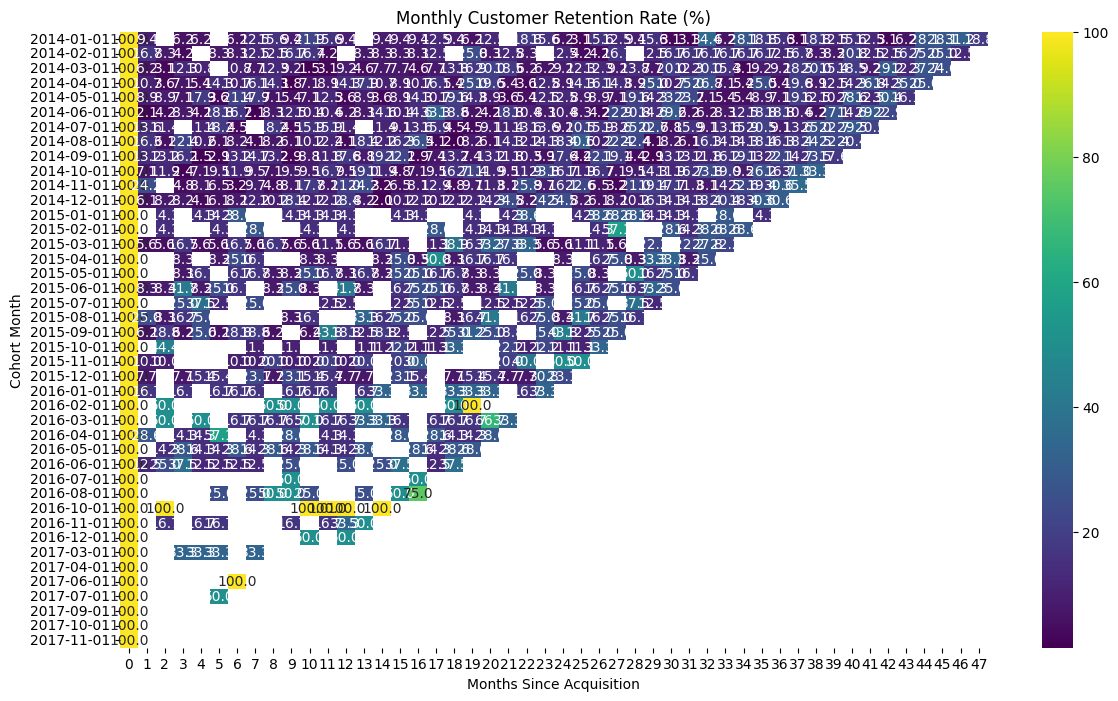

In [ ]:
## 6. Advanced Analysis: Cohort Analysis (Customer Retention)
# -----------------------------------------------------------------------------
# We want to see how many customers from a specific starting month (cohort)
# return to make purchases in subsequent months.

query_cohort = """
WITH customer_cohorts AS (
    -- Step 1: Find the acquisition month for each customer
    SELECT
        customer_id,
        STRFTIME('%Y-%m-01', MIN(order_date)) AS cohort_month
    FROM
        orders
    GROUP BY
        customer_id
),
order_months AS (
    -- Step 2: Get the month of each order for each customer
    SELECT
        customer_id,
        STRFTIME('%Y-%m-01', order_date) AS order_month
    FROM
        orders
)
-- Step 3: Calculate the cohort index for each order
SELECT
    c.cohort_month,
    o.order_month,
    (CAST(STRFTIME('%Y', o.order_month) AS INTEGER) - CAST(STRFTIME('%Y', c.cohort_month) AS INTEGER)) * 12 +
    (CAST(STRFTIME('%m', o.order_month) AS INTEGER) - CAST(STRFTIME('%m', c.cohort_month) AS INTEGER)) AS cohort_index,
    c.customer_id
FROM
    customer_cohorts c
JOIN
    order_months o ON c.customer_id = o.customer_id
"""

print("\n--- Cohort Analysis Data (Raw) ---")
cohort_data = run_query(query_cohort)
display(cohort_data.head())

# Now we pivot the data in pandas to create the retention matrix
cohort_counts = cohort_data.groupby(['cohort_month', 'cohort_index'])['customer_id'].nunique().reset_index()
cohort_pivot = cohort_counts.pivot_table(index='cohort_month', columns='cohort_index', values='customer_id')

# Calculate retention rate
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix = retention_matrix.round(3) * 100 # Show as percentage

print("\n--- Customer Retention Matrix (%) ---")
# Displaying with a heatmap for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
sns.heatmap(retention_matrix, annot=True, fmt='.1f', cmap='viridis')
plt.title('Monthly Customer Retention Rate (%)')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since Acquisition')
plt.show()

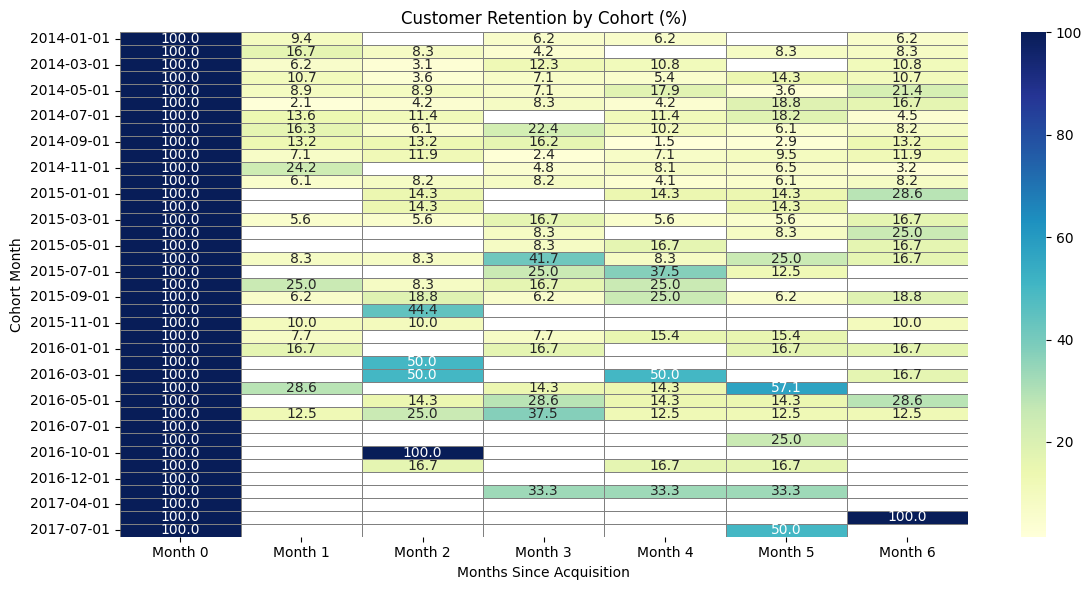

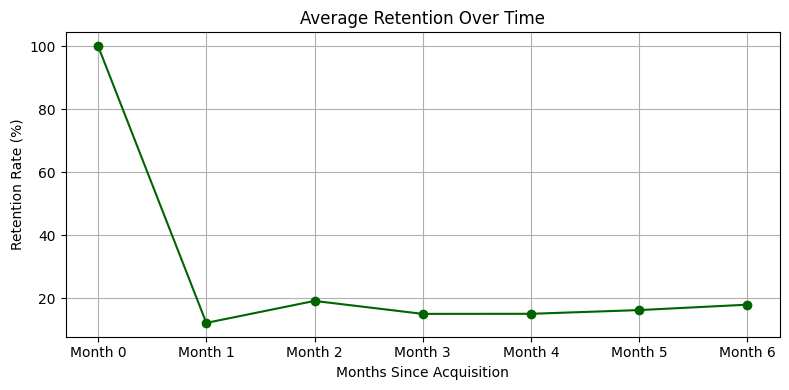

In [ ]:
# -----------------------------------------------------------------------------
# Cohort Analysis: Monthly Customer Retention
# -----------------------------------------------------------------------------
# Goal: Track how many customers from each acquisition month return in later months
# -----------------------------------------------------------------------------

# Step 1: SQL Query to Build Cohort Data
query_cohort = """
WITH customer_cohorts AS (
    SELECT
        customer_id,
        STRFTIME('%Y-%m-01', MIN(order_date)) AS cohort_month
    FROM orders
    GROUP BY customer_id
),
order_months AS (
    SELECT
        customer_id,
        STRFTIME('%Y-%m-01', order_date) AS order_month
    FROM orders
)
SELECT
    c.cohort_month,
    o.order_month,
    (CAST(STRFTIME('%Y', o.order_month) AS INTEGER) - CAST(STRFTIME('%Y', c.cohort_month) AS INTEGER)) * 12 +
    (CAST(STRFTIME('%m', o.order_month) AS INTEGER) - CAST(STRFTIME('%m', c.cohort_month) AS INTEGER)) AS cohort_index,
    c.customer_id
FROM customer_cohorts c
JOIN order_months o ON c.customer_id = o.customer_id
"""

# Step 2: Run Query and Load Data
cohort_data = run_query(query_cohort)

# Step 3: Aggregate Unique Customers by Cohort Month and Index
cohort_counts = (
    cohort_data.groupby(['cohort_month', 'cohort_index'])['customer_id']
    .nunique()
    .reset_index()
)

# Step 4: Pivot to Create Retention Matrix
cohort_pivot = cohort_counts.pivot_table(
    index='cohort_month',
    columns='cohort_index',
    values='customer_id'
)

# Step 5: Calculate Retention Rate (%)
cohort_size = cohort_pivot.iloc[:, 0]  # Month 0 = cohort size
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix = retention_matrix.round(3) * 100  # Convert to percentage

# -----------------------------------------------------------------------------
# Optional Cleanup: Limit to First 6 Months and Drop Incomplete Cohorts
# -----------------------------------------------------------------------------

# Limit to first 6 months
retention_matrix = retention_matrix.loc[:, :6]

# Drop last 2–3 cohorts (incomplete data)
retention_matrix = retention_matrix.iloc[:-3, :]

# Rename columns for clarity
retention_matrix.columns = [f'Month {i}' for i in retention_matrix.columns]

# -----------------------------------------------------------------------------
# Step 6: Plot Retention Heatmap
# -----------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(
    retention_matrix,
    annot=True,
    fmt='.1f',
    cmap='YlGnBu',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Customer Retention by Cohort (%)')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since Acquisition')
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Step 7: Plot Average Retention Curve (Optional)
# -----------------------------------------------------------------------------

avg_retention = retention_matrix.mean()
plt.figure(figsize=(8, 4))
avg_retention.plot(marker='o', color='darkgreen')
plt.title('Average Retention Over Time')
plt.xlabel('Months Since Acquisition')
plt.ylabel('Retention Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
## 7. Save Key Analysis Results and Close Connection
# -----------------------------------------------------------------------------
# Let's save the RFM table, as it will be the input for our clustering model.
rfm_csv_path = '/content/drive/MyDrive/Advanced Retail Analytics project/rfm_analysis.csv'
rfm_df.to_csv(rfm_csv_path, index=False)
print(f"RFM analysis results saved to: {rfm_csv_path}")

# It's important to close the database connection when you're done.
conn.close()
print("\nDatabase connection closed.")

RFM analysis results saved to: /content/drive/MyDrive/Advanced Retail Analytics project/rfm_analysis.csv

Database connection closed.
